# Лабораторная работа №5
> Выполнили:  
> – 339080, Дьячихин Данила Никитич  
> – 368606, Овчинников Павел Алексеевич

**Цель работы:** построить модели классификации на основе ансамблевых алгоритмов: бэггинг и градиентный бустинг, содержащие в качестве базовых алгоритмов решающие деревья.

**Инструменты:** бэггинг решающих деревьев (случайный лес, `RandomForest`), градиентный бустинг над решающими деревьями (`GradientBoostingRegressor`).

Будем использовать датасет, полученный в результате выполнения лабораторной работы №1 — `heart_preprocessed.csv`. Использование `Advertising_preprocessed.csv` опустим, т.к. этот датасет не является классическим для задач классификации, в отличие от `heart_preprocessed.csv`.

Импортируем необходимые библиотеки и загрузим датасеты

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import heatmap
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split

heart = pd.read_csv('heart_preprocessed.csv')
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   sex       296 non-null    int64  
 2   cp        296 non-null    int64  
 3   trestbps  296 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalach   296 non-null    float64
 8   exang     296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    int64  
 11  ca        296 non-null    int64  
 12  thal      296 non-null    int64  
 13  target    296 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 32.5 KB
None


Теперь разделим датасеты на признаки и целевую переменную, и обучающую и тестовую выборки в соотношении 80/20.

In [3]:
X = heart.drop('target', axis=1)
Y = heart['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Бэггинг решающих деревьев (случайный лес, `RandomForest`)

Зададим параметры для перебора в `GridSearchCV` и обучим модель случайного леса на лучших параметрах.

In [4]:
classifier = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
}
grid_search = GridSearchCV(estimator=classifier, param_grid=params, scoring='accuracy')

grid_search.fit(X_train, Y_train)
y_predict_rfc = grid_search.best_estimator_.predict(X_test)

Теперь выведем отчёт о классификации на тестовой выборке, чтобы оценить её качество.

In [5]:
print('Отчет о классификации:', classification_report(y_true=Y_test, y_pred=y_predict_rfc), sep='\n')
print('F1 (f1_score): ', f1_score(y_true=Y_test, y_pred=y_predict_rfc))

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.87      0.84      0.86        32

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

F1 (f1_score):  0.8571428571428571


# Градиентный бустинг над решающими деревьями (`GradientBoostingRegressor`)

Точно так же зададим параметры для перебора в `GridSearchCV` и обучим модель градиентного бустинга на лучших параметрах, которые выберет `GridSearchCV`.

In [6]:
classifier = GradientBoostingClassifier(random_state=42)
params = {
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 4, 5, 6],
}

grid_search = GridSearchCV(estimator=classifier, param_grid=params, scoring='accuracy')

grid_search.fit(X_train, Y_train)
y_predict_gbr = grid_search.best_estimator_.predict(X_test)

Выведем для модели отчёт о классификации на тестовой выборке, чтобы оценить её качество.

In [7]:
print('Отчет о классификации:', classification_report(y_true=Y_test, y_pred=y_predict_gbr), sep='\n')
print('F1 (f1_score): ', f1_score(y_true=Y_test, y_pred=y_predict_gbr))

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.86        32

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

F1 (f1_score):  0.8615384615384616


# Сравнительная оценка качества моделей

Определим критерии сравнения моделей:
- `f1_score` — среднее гармоническое между точностью и полнотой
- `heatmap` — матрица ошибок

Сравним модели по этим критериям и сделаем вывод о качестве работы моделей.

f1_score RandomForestClassifier:  0.8571428571428571
f1_score GradientBoostingClassifier:  0.8615384615384616


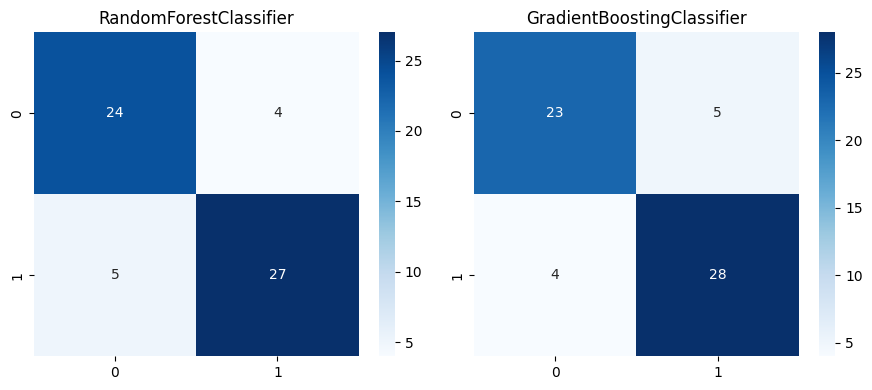

In [8]:
print('f1_score RandomForestClassifier: ', f1_score(y_true=Y_test, y_pred=y_predict_rfc))
print('f1_score GradientBoostingClassifier: ', f1_score(y_true=Y_test, y_pred=y_predict_gbr))

plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.title('RandomForestClassifier')
heatmap(confusion_matrix(Y_test, y_predict_rfc), annot=True, fmt='d', cmap='Blues')
plt.subplot(1, 2, 2)
plt.title('GradientBoostingClassifier')
heatmap(confusion_matrix(Y_test, y_predict_gbr), annot=True, fmt='d', cmap='Blues')
plt.tight_layout()

# Вывод
Как мы видим, `f1_score` у обеих моделей примерно одинаковый. Матрица ошибок показывает, что `RandomForest` ошибся на классе 1 на один раз больше, а `GradientBoostingRegressor` — точно так же на классе 0. В целом, обе модели показывают себя хорошо, но `GradientBoostingRegressor` работает гораздо быстрее, чем `RandomForest` (118 против 553 секунд), поэтому предпочтительнее использовать именно его, т.к. цена ошибки не такая большая относительно времени работы.